# CONCRETE STRENGTH PREDICTION

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### Getting our Data

In [2]:
df = pd.read_csv(r'C:\Users\DELL\Desktop\Kaggle+HE\Github GSSoC21\Concrete Strength Prediction TBD\Dataset\concrete_data.csv')
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


### Data Preprocessing

In [3]:
# checking for null values
df.isnull().any()

Cement                False
Blast Furnace Slag    False
Fly Ash               False
Water                 False
Superplasticizer      False
Coarse Aggregate      False
Fine Aggregate        False
Age                   False
Strength              False
dtype: bool

In [4]:
# checking vif
variables = df[['Cement','Blast Furnace Slag','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate','Age']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

vif

,VIF,Features
0,15.456717,Cement
1,3.329127,Blast Furnace Slag
2,4.147833,Fly Ash
3,82.157569,Water
4,5.471094,Superplasticizer
5,84.955779,Coarse Aggregate
6,72.790995,Fine Aggregate
7,1.699459,Age


In [5]:
# now, we'll drop columns which have vif>10
df = df.drop(['Cement','Water','Coarse Aggregate','Fine Aggregate'], axis=1)
df

,Blast Furnace Slag,Fly Ash,Superplasticizer,Age,Strength
0,0.0,0.0,2.5,28,79.99
1,0.0,0.0,2.5,28,61.89
2,142.5,0.0,0.0,270,40.27
3,142.5,0.0,0.0,365,41.05
4,132.4,0.0,0.0,360,44.30
...,...,...,...,...,...
1025,116.0,90.3,8.9,28,44.28
1026,0.0,115.6,10.4,28,31.18
1027,139.4,108.6,6.1,28,23.70
1028,186.7,0.0,11.3,28,32.77


<AxesSubplot:xlabel='Blast Furnace Slag'>

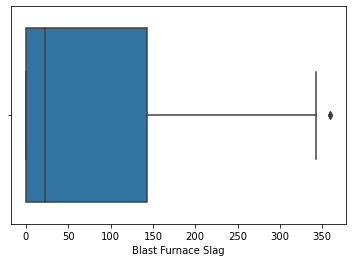

In [6]:
# checking for outliners
sb.boxplot(x=df['Blast Furnace Slag'])

In [7]:
# removing outliners
outliers_removed = [x for x in df['Blast Furnace Slag'] if x >= 300 and x <= 400]
for i in df['Blast Furnace Slag']:
    if i in set(outliers_removed):
        df['Blast Furnace Slag'] = df['Blast Furnace Slag'].replace(i,df['Blast Furnace Slag'].mean())

<AxesSubplot:xlabel='Blast Furnace Slag'>

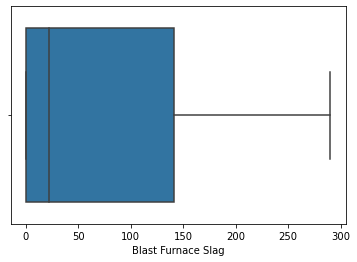

In [8]:
sb.boxplot(x=df['Blast Furnace Slag'])

<AxesSubplot:xlabel='Fly Ash'>

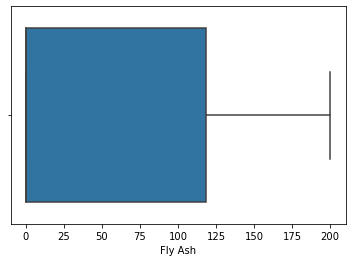

In [9]:
sb.boxplot(x=df['Fly Ash'])

<AxesSubplot:xlabel='Superplasticizer'>

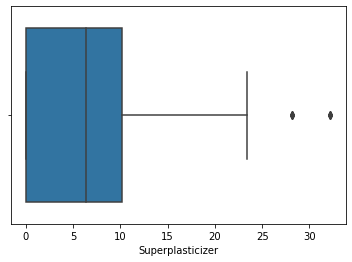

In [10]:
sb.boxplot(x=df['Superplasticizer'])

In [11]:
# removing outliners
outliers_removed = [x for x in df['Superplasticizer'] if x >= 25 and x <= 40]
for i in df['Superplasticizer']:
    if i in set(outliers_removed):
        df['Superplasticizer'] = df['Superplasticizer'].replace(i,df['Superplasticizer'].mean())

<AxesSubplot:xlabel='Superplasticizer'>

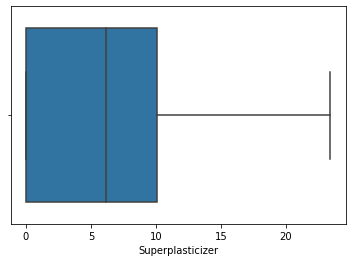

In [12]:
sb.boxplot(x=df['Superplasticizer'])

<AxesSubplot:xlabel='Age'>

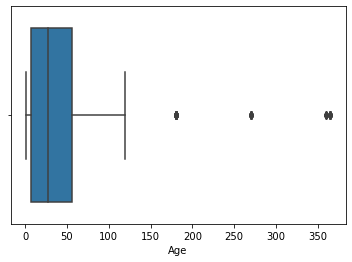

In [13]:
sb.boxplot(x=df['Age'])

In [14]:
# removing outliners
outliers_removed = [x for x in df['Age'] if x >= 150 and x <= 400]
for i in df['Age']:
    if i in set(outliers_removed):
        df['Age'] = df['Age'].replace(i,df['Age'].mean())

<AxesSubplot:xlabel='Age'>

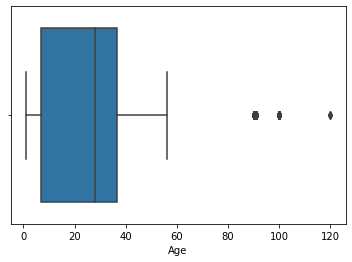

In [15]:
sb.boxplot(x=df['Age'])

In [16]:
# removing new outliners
outliers_removed = [x for x in df['Age'] if x >= 60 and x <= 150]
for i in df['Age']:
    if i in set(outliers_removed):
        df['Age'] = df['Age'].replace(i,df['Age'].mean())

<AxesSubplot:xlabel='Age'>

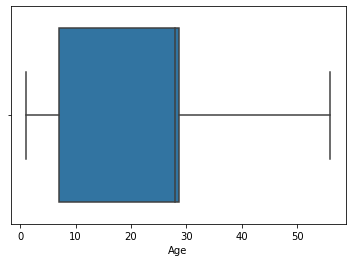

In [17]:
sb.boxplot(x=df['Age'])

In [18]:
# checking if standardization is required or not
df.describe()

,Blast Furnace Slag,Fly Ash,Superplasticizer,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,71.442625,54.188350,5.971083,24.786162,35.817961
std,82.569336,63.997004,5.477032,14.780427,16.705742
min,0.000000,0.000000,0.000000,1.000000,2.330000
25%,0.000000,0.000000,0.000000,7.000000,23.710000
50%,22.000000,0.000000,6.150000,28.000000,34.445000
75%,141.300000,118.300000,10.075000,28.664102,46.135000
max,290.200000,200.100000,23.400000,56.000000,82.600000


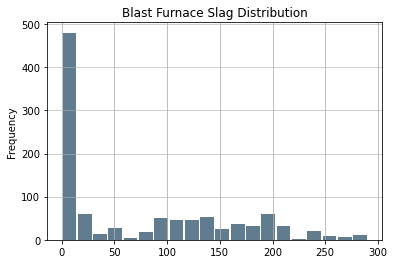

In [19]:
df['Blast Furnace Slag'].plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e')
plt.title('Blast Furnace Slag Distribution')
plt.grid(axis='y', alpha=0.75)

In [20]:
# the data seems to be left skewed; we'll have to check the value of skewness

In [21]:
# checking extent of skewness
print('Blast Furnace Slag Skewness:', df['Blast Furnace Slag'].skew())
print('Fly Ash Skewness:', df['Fly Ash'].skew())
print('Superplasticizer Skewness:', df['Superplasticizer'].skew())
print('Age Skewness:', df['Age'].skew())

Blast Furnace Slag Skewness: 0.7207693210681195
Fly Ash Skewness: 0.5373539058066844
Superplasticizer Skewness: 0.4695534757361076
Age Skewness: 0.2642589721506312


In [22]:
# as the skewness in within range of acceptance, we do not need to do any transformations

### Data Visualization

<AxesSubplot:>

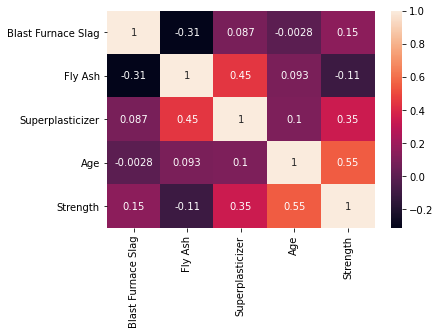

In [23]:
# using Pearson's correlation method
corr = df.corr(method='pearson')
sb.heatmap(corr, annot=True)

### Splitting Data for Training and Testing

In [24]:
data = df.values
X,y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)  # splitting in the ration 80:20

### Model

In [25]:
model = LinearRegression()

In [26]:
model.fit(X_train, y_train)

LinearRegression()

### Making Predictions and Checking Accuracy

In [27]:
y_pred = model.predict(X_test)

In [28]:
r2_score(y_test, y_pred)

0.47194805969559406

### With simple Linear Regression, we have achieved 47% accuracy. On applying other algorithms, accuracy of around 80% can be achieved.

### Getting the pkl file

In [29]:
import pickle
pickle.dump(model, open('ConcreteStrengthPrediction.pkl', 'wb'))